In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121, ResNet50, InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model, Sequential
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
data_dir = r'C:\Users\melis\MeanderHandPD_model\Meander_HandPD'

In [4]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    shear_range=0.05,
    rotation_range=5,
    horizontal_flip=False,
    fill_mode='nearest'
)

In [5]:
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 295 images belonging to 2 classes.


In [6]:
val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 73 images belonging to 2 classes.


In [7]:
def build_pretrained(base_model_class, num_classes=2):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # 🔧 compile eklendi
    return model

In [8]:
model_builders = {
    "DenseNet121": lambda: build_pretrained(DenseNet121),
    "ResNet50": lambda: build_pretrained(ResNet50),
    "InceptionV3": lambda: build_pretrained(InceptionV3)
}

In [10]:
histories = {}

for name, builder in model_builders.items():
    model = builder()  # Instantiate the model
    print(f"Training {name}...")
    history = model.fit(train_gen, validation_data=val_gen, epochs=5)
    histories[name] = history
    model.save(f"{name}.h5")

Training DenseNet121...
Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.7454 - loss: 0.8480

c:\Users\melis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 986ms/step - accuracy: 0.7482 - loss: 0.8304 - val_accuracy: 0.9178 - val_loss: 0.2572
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 685ms/step - accuracy: 0.8099 - loss: 0.3904 - val_accuracy: 0.8082 - val_loss: 0.4653
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 661ms/step - accuracy: 0.7813 - loss: 0.5270 - val_accuracy: 0.8767 - val_loss: 0.2705
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 647ms/step - accuracy: 0.8879 - loss: 0.3249 - val_accuracy: 0.8904 - val_loss: 0.2115
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 669ms/step - accuracy: 0.9165 - loss: 0.2313 - val_accuracy: 0.8904 - val_loss: 0.2017


Training ResNet50...
Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 862ms/step - accuracy: 0.6022 - loss: 1.0937 - val_accuracy: 0.8082 - val_loss: 0.4959
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 664ms/step - accuracy: 0.8451 - loss: 0.7280 - val_accuracy: 0.1918 - val_loss: 0.8964
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 640ms/step - accuracy: 0.4450 - loss: 0.7775 - val_accuracy: 0.8082 - val_loss: 0.5246
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 641ms/step - accuracy: 0.8274 - loss: 0.4436 - val_accuracy: 0.8082 - val_loss: 0.4751
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 631ms/step - accuracy: 0.8106 - loss: 0.4625 - val_accuracy: 0.8082 - val_loss: 0.4594


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training InceptionV3...
Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 610ms/step - accuracy: 0.6185 - loss: 2.7394 - val_accuracy: 0.5068 - val_loss: 0.7040
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 446ms/step - accuracy: 0.7285 - loss: 0.6778 - val_accuracy: 0.8493 - val_loss: 0.4601
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 410ms/step - accuracy: 0.8108 - loss: 0.4669 - val_accuracy: 0.8767 - val_loss: 0.3644
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 421ms/step - accuracy: 0.8381 - loss: 0.4378 - val_accuracy: 0.8630 - val_loss: 0.3588
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 408ms/step - accuracy: 0.8315 - loss: 0.3872 - val_accuracy: 0.8082 - val_loss: 0.4035


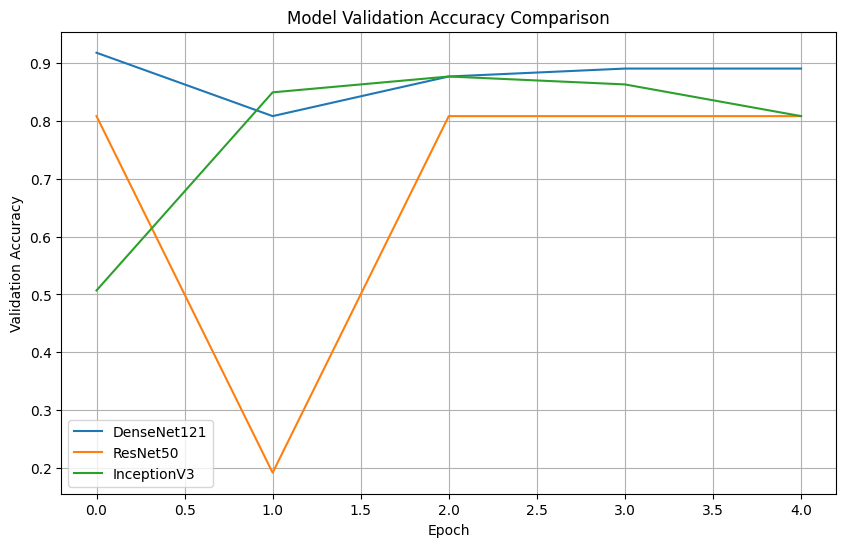

In [11]:
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)
plt.title("Model Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
from tensorflow.keras.preprocessing import image

In [31]:
img_pathControl = r'C:\Users\melis\MeanderHandPD_model\exampleControl.png'
img_pathPatient = r'C:\Users\melis\MeanderHandPD_model\examplePatient.png'
imgControl = image.load_img(img_pathControl, target_size=(224, 224))
imgPatient = image.load_img(img_pathPatient, target_size=(224, 224))

In [32]:
imgC_array = image.img_to_array(imgControl)
imgC_array = np.expand_dims(imgC_array, axis=0)
imgC_array = imgC_array / 255.0

In [33]:
imgP_array = image.img_to_array(imgPatient)
imgP_array = np.expand_dims(imgP_array, axis=0)
imgP_array = imgP_array / 255.0

In [34]:
from tensorflow.keras.models import load_model

best_model = load_model(r'C:\Users\melis\MeanderHandPD_model\DenseNet121.h5')
pred1 = best_model.predict(imgC_array)
pred2 = best_model.predict(imgP_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


In [35]:
predicted_class = np.argmax(pred1)
class_labels = list(train_gen.class_indices.keys())
print(f"1. için tahmin edilen sınıf: {class_labels[predicted_class]}")

1. için tahmin edilen sınıf: MeanderControl


In [36]:
predicted_class = np.argmax(pred2)
class_labels = list(train_gen.class_indices.keys())
print(f"2. için tahmin edilen sınıf: {class_labels[predicted_class]}")

2. için tahmin edilen sınıf: MeanderPatients
